# Aplicando PCA sobre RandomForest

En este JN, voy a aplicarle un PCA para saber si puedo mejorar mi modelo de alguna forma.

Al final, en la sección de Conclusiones, valoraré si finalmente le aplico a mi modelo PCA o no.

*Cada vez que aplico un PCA vuelvo a importar las librerías y a cargar el datasaset dado que si no lo hago me da error al calcular determinados scores o coeficientes.

Empiezo importando las librerías que voy a utilizar y cargando mi dataset.

In [138]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas.io

import matplotlib.pyplot as plt

import librosa.display
import librosa

from glob import glob

import ffmpeg

import os

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy import interp

from itertools import cycle

import seaborn as sns

import pickle

In [139]:
def readCsvToDataFrame(path):
    theDataFrame= pd.read_csv(path)
    return theDataFrame

data = readCsvToDataFrame('data_fourier_64.csv')

# PCA - 30

Empiezo probando a reducir el número de features de mi modelo a 30, para obtener las diferentes métricas que he obtenido antes, y ver si mejoran sustancialmente mis resultados.

Empiezo escalando las diferentes features que tengo para podemos aplicarle el PCA.

In [140]:
features = ['mfcc', 'scem','scom', 'srom','sbwm', 'tempo', 'rmse', 
            'Fourier1', 'Fourier2', 'Fourier3', 'Fourier4', 'Fourier5', 
            'Fourier6', 'Fourier7', 'Fourier8', 'Fourier9', 'Fourier10',
            'Fourier11', 'Fourier12', 'Fourier13', 'Fourier14', 'Fourier15',
            'Fourier16', 'Fourier17', 'Fourier18', 'Fourier19', 'Fourier20',
            'Fourier21', 'Fourier22', 'Fourier23', 'Fourier24', 'Fourier25',
            'Fourier26', 'Fourier27', 'Fourier28', 'Fourier29', 'Fourier30',
            'Fourier31', 'Fourier32', 'Fourier33', 'Fourier34', 'Fourier35', 
            'Fourier36', 'Fourier37', 'Fourier38', 'Fourier39', 'Fourier40',
            'Fourier41', 'Fourier42', 'Fourier43', 'Fourier44', 'Fourier45',
            'Fourier46', 'Fourier47', 'Fourier48', 'Fourier49', 'Fourier50',
            'Fourier51', 'Fourier52', 'Fourier53', 'Fourier54', 'Fourier55',
            'Fourier56', 'Fourier57', 'Fourier58', 'Fourier59', 'Fourier60',
            'Fourier61', 'Fourier62', 'Fourier63', 'Fourier64']

x = data.loc[:, features].values
y = data.loc[:,['momento']].values

x = StandardScaler().fit_transform(x)

A continuación le aplico el PCA, reduciendo las features de 71 a 30, y muestro el dataset resultante.

In [141]:
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1',
                                      'principal component 2',
                                      'principal component 3',
                                      'principal component 4',
                                      'principal component 5',
                                      'principal component 6',
                                      'principal component 7',
                                      'principal component 8',
                                      'principal component 9',
                                      'principal component 10',
                                      'principal component 11',
                                      'principal component 12',
                                      'principal component 13',
                                      'principal component 14',
                                      'principal component 15',
                                      'principal component 16',
                                      'principal component 17',
                                      'principal component 18',
                                      'principal component 19',
                                      'principal component 20',
                                      'principal component 21',
                                      'principal component 22',
                                      'principal component 23',
                                      'principal component 24',
                                      'principal component 25',
                                      'principal component 26',
                                      'principal component 27',
                                      'principal component 28',
                                      'principal component 29',
                                      'principal component 30'])

principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 21,principal component 22,principal component 23,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30
0,-4.595156,-0.377174,0.636453,-0.757185,-0.188467,0.012078,1.217251,0.338256,0.449602,0.293096,...,-0.686100,0.154837,-0.120013,-0.495813,-0.311715,-0.453892,-0.005122,-0.938225,-0.006789,0.139815
1,-0.978970,1.703208,-0.300757,-0.219847,0.744634,0.685766,-0.413120,-1.778107,-0.831050,-1.039592,...,-0.207048,0.632888,-0.420781,0.051234,-0.274672,-0.374449,0.237064,0.221058,-0.166862,0.113260
2,-0.795181,-3.767270,-2.368550,0.471118,-3.634326,-0.245069,-0.722253,-0.834772,0.805692,1.257296,...,-0.555908,0.018840,0.762103,-0.520520,-0.143210,0.015190,-0.338588,0.619349,0.316987,-0.350532
3,8.037264,1.001922,1.418926,0.842466,1.290557,-1.082219,0.687615,-0.906943,-3.998332,1.296716,...,-0.764222,1.142164,-0.451344,-0.116020,-1.448609,-1.764114,1.881013,2.061706,-0.456538,0.659715
4,-1.065728,-2.151948,-0.964398,0.432608,-1.098429,0.246682,-0.595671,1.028460,-0.089668,0.738233,...,0.290900,0.312956,-0.394790,1.055879,-0.795904,-0.103401,0.963868,-0.174673,-0.148225,0.477003


Y ahora, para poder trabajar y concatenar la X y la y de forma correcta y que no me de errores, reseteo los índices de ambos dataframes.

In [142]:
principalDf.reset_index(drop=True, inplace=True)

aux = data[['momento']]
aux.reset_index(drop=True, inplace=True)

finalDf = pd.concat([principalDf, aux], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 22,principal component 23,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30,momento
0,-4.595156,-0.377174,0.636453,-0.757185,-0.188467,0.012078,1.217251,0.338256,0.449602,0.293096,...,0.154837,-0.120013,-0.495813,-0.311715,-0.453892,-0.005122,-0.938225,-0.006789,0.139815,Timbre
1,-0.978970,1.703208,-0.300757,-0.219847,0.744634,0.685766,-0.413120,-1.778107,-0.831050,-1.039592,...,0.632888,-0.420781,0.051234,-0.274672,-0.374449,0.237064,0.221058,-0.166862,0.113260,Cena
2,-0.795181,-3.767270,-2.368550,0.471118,-3.634326,-0.245069,-0.722253,-0.834772,0.805692,1.257296,...,0.018840,0.762103,-0.520520,-0.143210,0.015190,-0.338588,0.619349,0.316987,-0.350532,Lavadora
3,8.037264,1.001922,1.418926,0.842466,1.290557,-1.082219,0.687615,-0.906943,-3.998332,1.296716,...,1.142164,-0.451344,-0.116020,-1.448609,-1.764114,1.881013,2.061706,-0.456538,0.659715,Secador_pelo
4,-1.065728,-2.151948,-0.964398,0.432608,-1.098429,0.246682,-0.595671,1.028460,-0.089668,0.738233,...,0.312956,-0.394790,1.055879,-0.795904,-0.103401,0.963868,-0.174673,-0.148225,0.477003,Aire_acondicionado


Debido a la reducción de features al aplicar el CA, parte de la totalidad de la variación explicada del modelo original se pierde, por lo que voy a ver cómo se distribuye esta variación entre las 30 features, cuánta variación se explica y cuánta se ha perdido.

In [143]:
print('La variación explicada por cada feature ha sido de {} respectivamente.'.format(pca.explained_variance_ratio_))
print('La variación explicada total de este modelo con respecto al original ha sido del {:.2f}%.'.format(np.sum(pca.explained_variance_ratio_)*100))
print('La variación perdida con respecto al modelo original ha sido del {:.2f}%.'.format(100 - np.sum(pca.explained_variance_ratio_)*100))

La variación explicada por cada feature ha sido de [0.39586861 0.11113832 0.06316714 0.04689701 0.03846895 0.0290333
 0.02813185 0.02312015 0.01976219 0.01740447 0.0168396  0.01410273
 0.01310763 0.01286422 0.01206328 0.01124582 0.01077358 0.00996505
 0.00949853 0.00879132 0.00821487 0.00780502 0.00755091 0.00753189
 0.00741619 0.00722275 0.00673928 0.00671626 0.00614557 0.00607855] respectivamente.
La variación explicada total de este modelo con respecto al original ha sido del 96.37%.
La variación perdida con respecto al modelo original ha sido del 3.63%.


Como se puede observar debajo, la correlación entre las diferentes features prácticamente ha desaparecido.

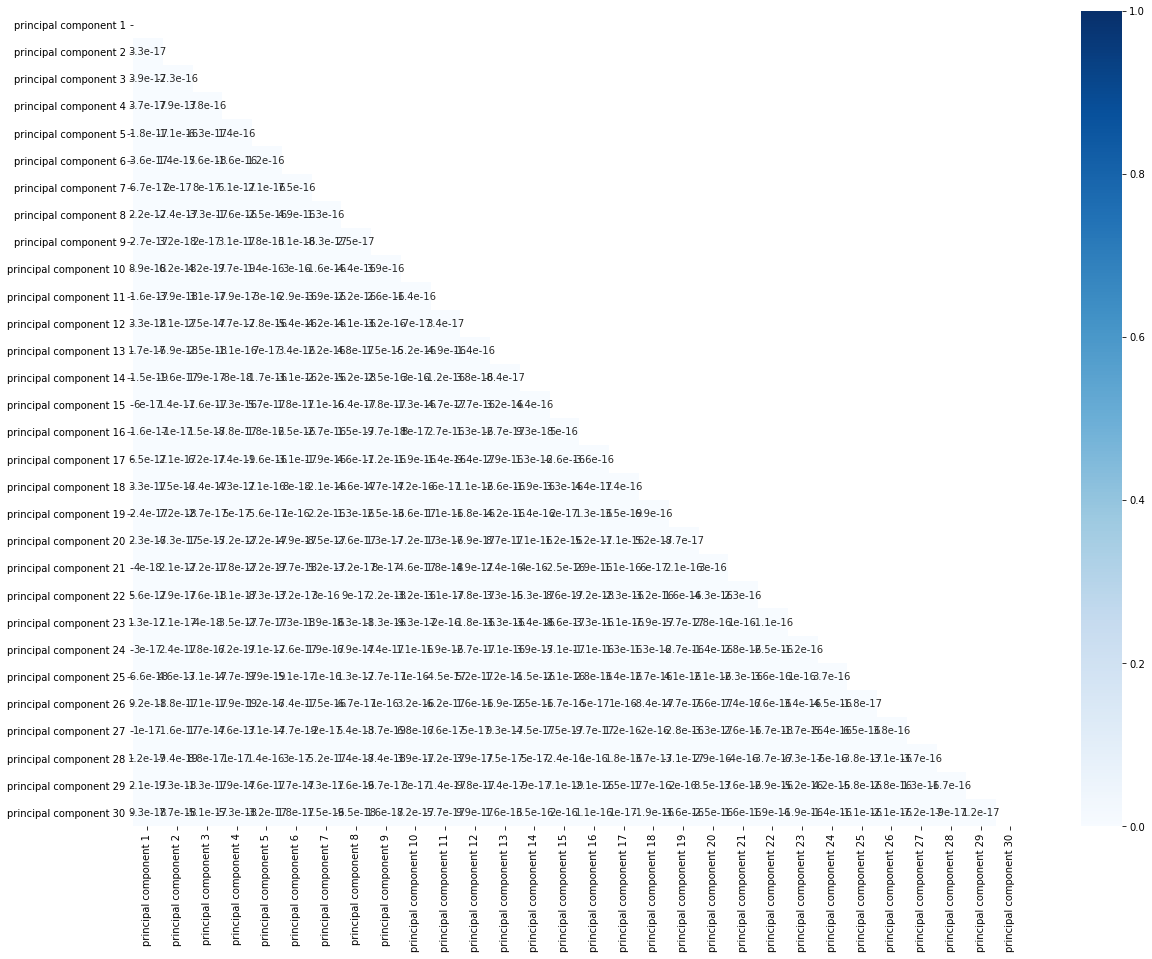

In [144]:
def get_matrix(dataset, classes):
    mask = np.zeros_like(dataset.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20,15))
    ax = sns.heatmap(dataset.corr(), mask=mask, annot=True, cmap="Blues")

#     sns.set(style="ticks")
#     sns.pairplot(dataset, hue=classes)
    
get_matrix(finalDf, 'momento')

Y termino con el mismo análisis que hice con el modelo original.

Es por ello que noy voy a entrar a dar epxlicaciones ni para este modelo ni para el resto de PCA, dado que las voy a dar todas juntas en la sección final de Conclusiones de este JN.

In [145]:
y = pd.get_dummies(data=finalDf.momento)
X = data.loc[:, finalDf.columns != 'momento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [146]:
clf1 = OneVsRestClassifier(RandomForestClassifier(n_estimators=60))
scores = cross_val_score(clf1, X, y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.97136872 0.97067039 0.97625698 0.97136872 0.96438547 0.97625698
 0.97346369 0.96925227 0.97624039 0.9706499 ]
Accuracy: 0.97 (+/- 0.01)


In [147]:
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.9727653631284916

In [148]:
filename = 'finalized_model_fourier_64_PCA.sav'
pickle.dump(clf1, open(filename, 'wb'))

In [149]:
predictions = clf1.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: Afeitadora            0.00
Aire_acondicionado    0.00
Alarma                0.00
Aspiradora            0.00
Cena                  0.00
Ducha                 0.00
Grifo                 0.00
Lavadora              0.00
Licuadora             0.01
Microondas            0.00
Secador_pelo          0.00
Secadora              0.00
Silencio              0.00
Tecleo                0.00
Telefono              0.00
Timbre                0.00
dtype: float64 degrees.


In [150]:
cls = RandomForestClassifier(n_estimators=40, random_state=0)
cls.fit(X_train, y_train)
importances = cls.feature_importances_

In [151]:
std = np.std([tree.feature_importances_ for tree in cls.estimators_], axis=0)

In [152]:
indices = np.argsort(importances)[::-1]

In [153]:
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

display(pd.DataFrame(cls.feature_importances_, 
                     index = X_train.columns, 
                     columns = ['importance']).sort_values('importance', ascending=False))

Feature ranking:
1. feature 2 (0.140963)
2. feature 1 (0.119839)
3. feature 0 (0.119594)
4. feature 4 (0.110542)
5. feature 6 (0.100859)
6. feature 3 (0.095566)
7. feature 8 (0.028031)
8. feature 9 (0.020039)
9. feature 13 (0.019726)
10. feature 11 (0.018055)
11. feature 10 (0.017402)
12. feature 14 (0.017041)
13. feature 20 (0.017025)
14. feature 18 (0.016902)
15. feature 12 (0.016228)
16. feature 19 (0.014337)
17. feature 16 (0.011794)
18. feature 15 (0.011460)
19. feature 26 (0.011318)
20. feature 17 (0.010332)
21. feature 21 (0.010009)
22. feature 25 (0.009558)
23. feature 27 (0.009250)
24. feature 7 (0.009042)
25. feature 28 (0.008938)
26. feature 29 (0.008889)
27. feature 24 (0.008132)
28. feature 23 (0.006974)
29. feature 5 (0.006553)
30. feature 22 (0.005602)


,importance
scom,0.140963
scem,0.119839
mfcc,0.119594
sbwm,0.110542
rmse,0.100859
srom,0.095566
Fourier2,0.028031
Fourier3,0.020039
Fourier7,0.019726
Fourier5,0.018055


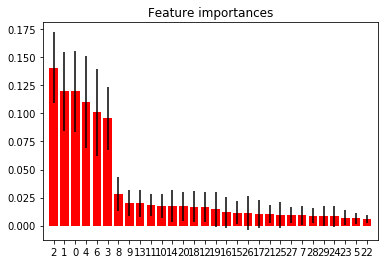

In [154]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [155]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf1.predict(X_test).argmax(axis=1)

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.9731145251396648

In [156]:
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.9753016749117469

In [157]:
precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                          'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                          'Licuadora', 'Alarma', 'Grifo', 'Microondas']
precision_recall.index.name = 'momento_aux'
precision_recall

,precision,recall,f1_score
momento_aux,,,
Cena,0.725000,1.000000,0.840580
Ducha,1.000000,0.983607,0.991736
Lavadora,1.000000,0.989691,0.994819
Aspiradora,0.987578,0.940828,0.963636
Afeitadora,0.992424,1.000000,0.996198
Secador_pelo,0.994505,0.967914,0.981030
Aire_acondicionado,1.000000,0.982659,0.991254
Telefono,0.981982,0.981982,0.981982
Tecleo,1.000000,0.839623,0.912821


Confusion matrix, without normalization
[[174   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 180   0   0   0   0   0   3   0   0   0   0   0   0   0   0]
 [  1   0 192   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [ 10   0   0 159   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 131   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   1 181   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   1 170   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0 218   0   0   0   0   0   0   0   0]
 [ 31   0   0   2   0   0   0   0 178   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0 167   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0 186   0   0   0   0   0]
 [  2   0   0   0   0   0   0   1   0   0   0 199   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 189   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0   0   0 183   0   0]
 [  0   0   0   0   0 

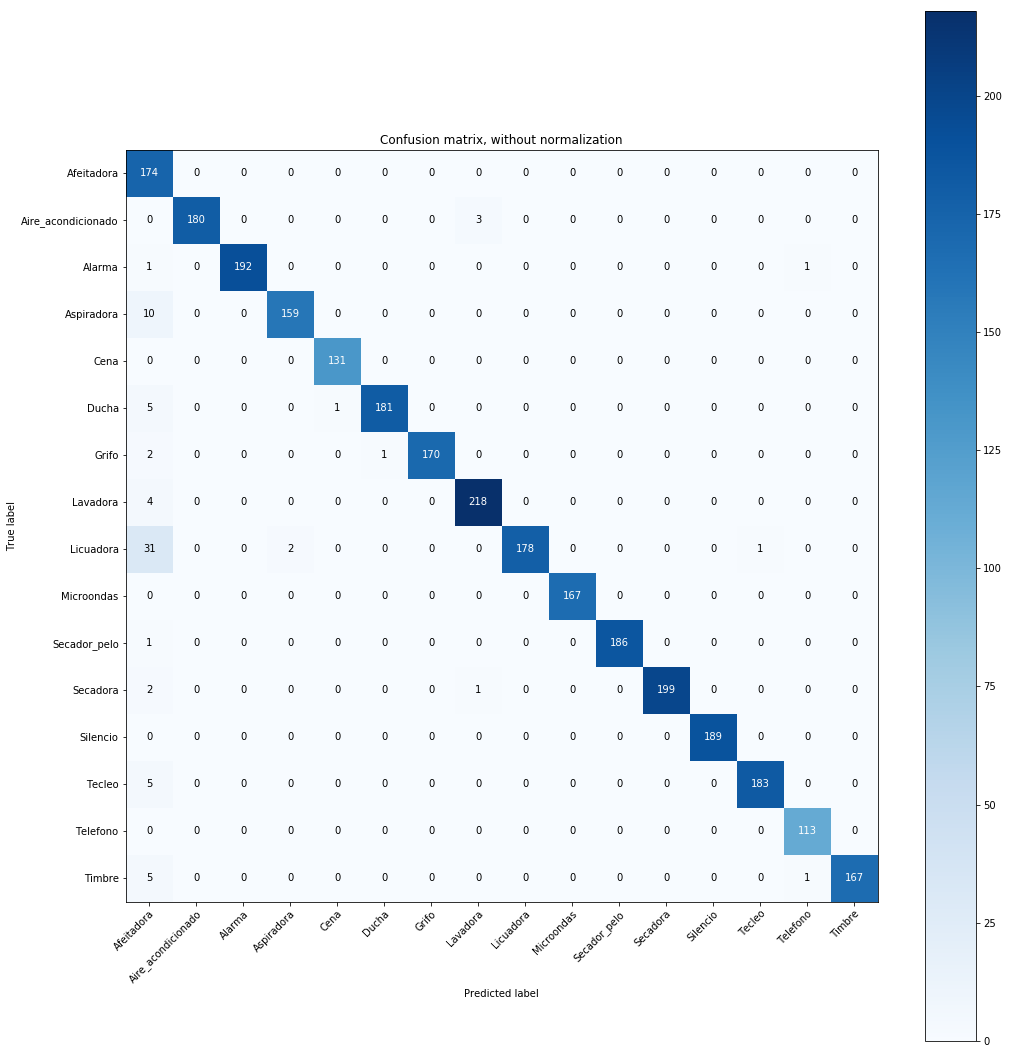

In [158]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

In [159]:
y = label_binarize(y, classes=['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                               'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                               'Licuadora', 'Alarma', 'Grifo', 'Microondas'])
n_classes = y.shape[1]

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [161]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=40))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [162]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [163]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [164]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [165]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [166]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

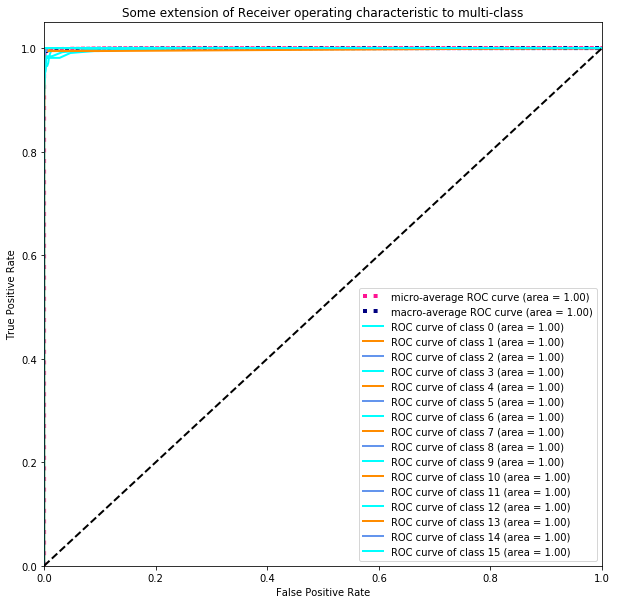

In [167]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# PCA - 20

In [168]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas.io

import matplotlib.pyplot as plt

import librosa.display
import librosa

from glob import glob

import ffmpeg

import os

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy import interp

from itertools import cycle

import seaborn as sns

import pickle

In [169]:
def readCsvToDataFrame(path):
    theDataFrame= pd.read_csv(path)
    return theDataFrame

data = readCsvToDataFrame('data_fourier_64.csv')

In [170]:
features = ['mfcc', 'scem','scom', 'srom','sbwm', 'tempo', 'rmse', 
            'Fourier1', 'Fourier2', 'Fourier3', 'Fourier4', 'Fourier5', 
            'Fourier6', 'Fourier7', 'Fourier8', 'Fourier9', 'Fourier10',
            'Fourier11', 'Fourier12', 'Fourier13', 'Fourier14', 'Fourier15',
            'Fourier16', 'Fourier17', 'Fourier18', 'Fourier19', 'Fourier20',
            'Fourier21', 'Fourier22', 'Fourier23', 'Fourier24', 'Fourier25',
            'Fourier26', 'Fourier27', 'Fourier28', 'Fourier29', 'Fourier30',
            'Fourier31', 'Fourier32', 'Fourier33', 'Fourier34', 'Fourier35', 
            'Fourier36', 'Fourier37', 'Fourier38', 'Fourier39', 'Fourier40',
            'Fourier41', 'Fourier42', 'Fourier43', 'Fourier44', 'Fourier45',
            'Fourier46', 'Fourier47', 'Fourier48', 'Fourier49', 'Fourier50',
            'Fourier51', 'Fourier52', 'Fourier53', 'Fourier54', 'Fourier55',
            'Fourier56', 'Fourier57', 'Fourier58', 'Fourier59', 'Fourier60',
            'Fourier61', 'Fourier62', 'Fourier63', 'Fourier64']

x = data.loc[:, features].values
y = data.loc[:,['momento']].values

x = StandardScaler().fit_transform(x)

In [171]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1',
                                      'principal component 2',
                                      'principal component 3',
                                      'principal component 4',
                                      'principal component 5',
                                      'principal component 6',
                                      'principal component 7',
                                      'principal component 8',
                                      'principal component 9',
                                      'principal component 10',
                                      'principal component 11',
                                      'principal component 12',
                                      'principal component 13',
                                      'principal component 14',
                                      'principal component 15',
                                      'principal component 16',
                                      'principal component 17',
                                      'principal component 18',
                                      'principal component 19',
                                      'principal component 20'])

principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20
0,-4.595156,-0.377171,0.636388,-0.757188,-0.188175,0.010479,1.216869,0.339013,0.448994,0.281495,-0.932867,0.660145,1.213102,1.041446,0.866735,-0.512317,0.316556,-0.126777,-0.903435,0.545805
1,-0.978970,1.703204,-0.300771,-0.220043,0.744618,0.684251,-0.413779,-1.780969,-0.830388,-1.045925,-0.368963,-0.054629,-0.315129,0.875397,-0.243929,-0.170103,0.145073,-0.086404,-1.791415,0.742666
2,-0.795181,-3.767271,-2.368571,0.471203,-3.634075,-0.245395,-0.721953,-0.834011,0.804135,1.254118,0.560889,-1.050520,-0.518076,-1.411237,-1.139114,1.772258,-0.472580,-1.779897,-0.934785,-0.378525
3,8.037263,1.001917,1.418925,0.841977,1.290034,-1.084379,0.685940,-0.914733,-3.995839,1.292549,-1.721093,0.639494,-1.068650,-1.446975,-1.253638,-0.780788,1.205590,-0.898623,0.572285,-1.940498
4,-1.065728,-2.151946,-0.964375,0.432361,-1.098815,0.246041,-0.596463,1.024964,-0.087864,0.735282,0.645525,-0.612859,-0.107881,0.842085,-0.102224,-0.285187,0.311067,0.830222,-0.200004,0.470209


In [172]:
principalDf.reset_index(drop=True, inplace=True)

aux = data[['momento']]
aux.reset_index(drop=True, inplace=True)

finalDf = pd.concat([principalDf, aux], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,momento
0,-4.595156,-0.377171,0.636388,-0.757188,-0.188175,0.010479,1.216869,0.339013,0.448994,0.281495,...,0.660145,1.213102,1.041446,0.866735,-0.512317,0.316556,-0.126777,-0.903435,0.545805,Timbre
1,-0.978970,1.703204,-0.300771,-0.220043,0.744618,0.684251,-0.413779,-1.780969,-0.830388,-1.045925,...,-0.054629,-0.315129,0.875397,-0.243929,-0.170103,0.145073,-0.086404,-1.791415,0.742666,Cena
2,-0.795181,-3.767271,-2.368571,0.471203,-3.634075,-0.245395,-0.721953,-0.834011,0.804135,1.254118,...,-1.050520,-0.518076,-1.411237,-1.139114,1.772258,-0.472580,-1.779897,-0.934785,-0.378525,Lavadora
3,8.037263,1.001917,1.418925,0.841977,1.290034,-1.084379,0.685940,-0.914733,-3.995839,1.292549,...,0.639494,-1.068650,-1.446975,-1.253638,-0.780788,1.205590,-0.898623,0.572285,-1.940498,Secador_pelo
4,-1.065728,-2.151946,-0.964375,0.432361,-1.098815,0.246041,-0.596463,1.024964,-0.087864,0.735282,...,-0.612859,-0.107881,0.842085,-0.102224,-0.285187,0.311067,0.830222,-0.200004,0.470209,Aire_acondicionado


In [173]:
print('La variación explicada por cada feature ha sido de {} respectivamente.'.format(pca.explained_variance_ratio_))
print('La variación explicada total de este modelo con respecto al original ha sido del {:.2f}%.'.format(np.sum(pca.explained_variance_ratio_)*100))
print('La variación perdida con respecto al modelo original ha sido del {:.2f}%.'.format(100 - np.sum(pca.explained_variance_ratio_)*100))

La variación explicada por cada feature ha sido de [0.39586861 0.11113832 0.06316714 0.04689701 0.03846895 0.02903329
 0.02813185 0.02312007 0.01976216 0.0174039  0.01683923 0.01410185
 0.0130993  0.01286143 0.0120591  0.01123333 0.01073911 0.00986661
 0.00947844 0.00878588] respectivamente.
La variación explicada total de este modelo con respecto al original ha sido del 89.21%.
La variación perdida con respecto al modelo original ha sido del 10.79%.


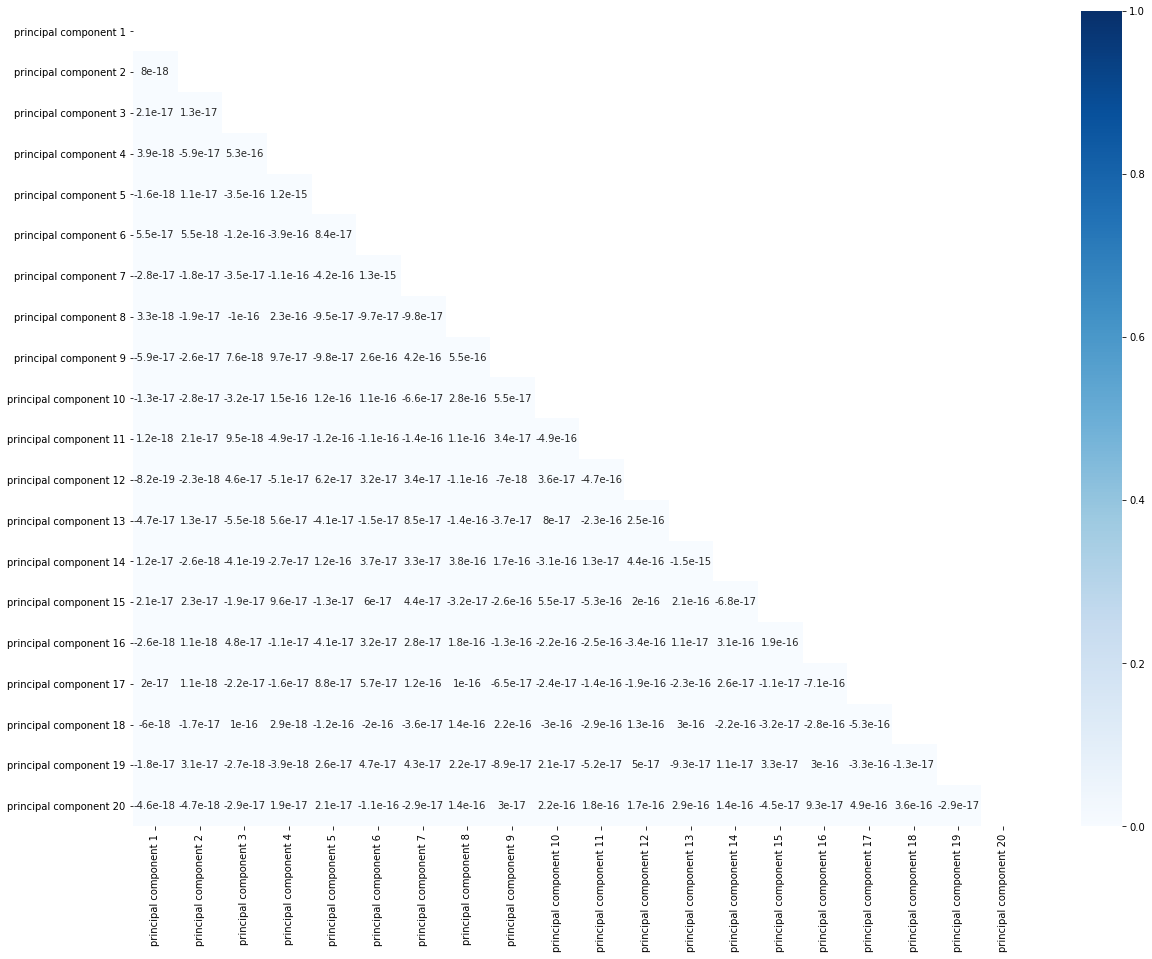

In [174]:
def get_matrix(dataset, classes):
    mask = np.zeros_like(dataset.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20,15))
    ax = sns.heatmap(dataset.corr(), mask=mask, annot=True, cmap="Blues")

#     sns.set(style="ticks")
#     sns.pairplot(dataset, hue=classes)
    
get_matrix(finalDf, 'momento')

In [175]:
y = pd.get_dummies(data=finalDf.momento)
X = data.loc[:, finalDf.columns != 'momento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [176]:
clf2 = OneVsRestClassifier(RandomForestClassifier(n_estimators=60))
scores = cross_val_score(clf2, X, y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.98044693 0.97625698 0.98324022 0.97835196 0.96997207 0.98673184
 0.97765363 0.97484277 0.9769392  0.97204752]
Accuracy: 0.98 (+/- 0.01)


In [177]:
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.9769553072625698

In [179]:
predictions = clf2.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: Afeitadora            0.00
Aire_acondicionado    0.00
Alarma                0.00
Aspiradora            0.00
Cena                  0.00
Ducha                 0.00
Grifo                 0.00
Lavadora              0.00
Licuadora             0.01
Microondas            0.00
Secador_pelo          0.00
Secadora              0.00
Silencio              0.00
Tecleo                0.00
Telefono              0.00
Timbre                0.00
dtype: float64 degrees.


In [180]:
cls = RandomForestClassifier(n_estimators=40, random_state=0)
cls.fit(X_train, y_train)
importances = cls.feature_importances_

In [181]:
std = np.std([tree.feature_importances_ for tree in cls.estimators_], axis=0)

In [182]:
indices = np.argsort(importances)[::-1]

In [183]:
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

display(pd.DataFrame(cls.feature_importances_, 
                     index = X_train.columns, 
                     columns = ['importance']).sort_values('importance', ascending=False))

Feature ranking:
1. feature 2 (0.156951)
2. feature 1 (0.128815)
3. feature 0 (0.128518)
4. feature 4 (0.127711)
5. feature 6 (0.107663)
6. feature 3 (0.104257)
7. feature 14 (0.027039)
8. feature 13 (0.025310)
9. feature 8 (0.024745)
10. feature 11 (0.019915)
11. feature 10 (0.019770)
12. feature 12 (0.019676)
13. feature 18 (0.019279)
14. feature 19 (0.018674)
15. feature 9 (0.018422)
16. feature 17 (0.015199)
17. feature 16 (0.012017)
18. feature 15 (0.010948)
19. feature 7 (0.009127)
20. feature 5 (0.005963)


,importance
scom,0.156951
scem,0.128815
mfcc,0.128518
sbwm,0.127711
rmse,0.107663
srom,0.104257
Fourier8,0.027039
Fourier7,0.025310
Fourier2,0.024745
Fourier5,0.019915


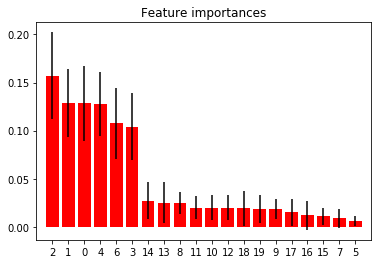

In [184]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [185]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf2.predict(X_test).argmax(axis=1)

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.9776536312849162

In [186]:
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.9772497696786239

In [187]:
precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                          'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                          'Licuadora', 'Alarma', 'Grifo', 'Microondas']
precision_recall.index.name = 'momento_aux'
precision_recall

,precision,recall,f1_score
momento_aux,,,
Cena,0.739496,1.000000,0.850242
Ducha,1.000000,0.994220,0.997101
Lavadora,1.000000,1.000000,1.000000
Aspiradora,0.994048,0.954286,0.973761
Afeitadora,1.000000,0.962121,0.980695
Secador_pelo,1.000000,0.978723,0.989247
Aire_acondicionado,1.000000,0.988166,0.994048
Telefono,1.000000,0.988095,0.994012
Tecleo,1.000000,0.905759,0.950549


Confusion matrix, without normalization
[[176   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1 172   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 185   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0 167   0   0   0   0   0   0   0   0   0   0   1   0]
 [  5   0   0   0 127   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0 184   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0 167   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0 249   0   0   0   0   0   0   0   0]
 [ 17   0   0   1   0   0   0   0 173   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0 203   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0 173   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0 169   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 173   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0 203   0   0]
 [  3   0   0   0   0 

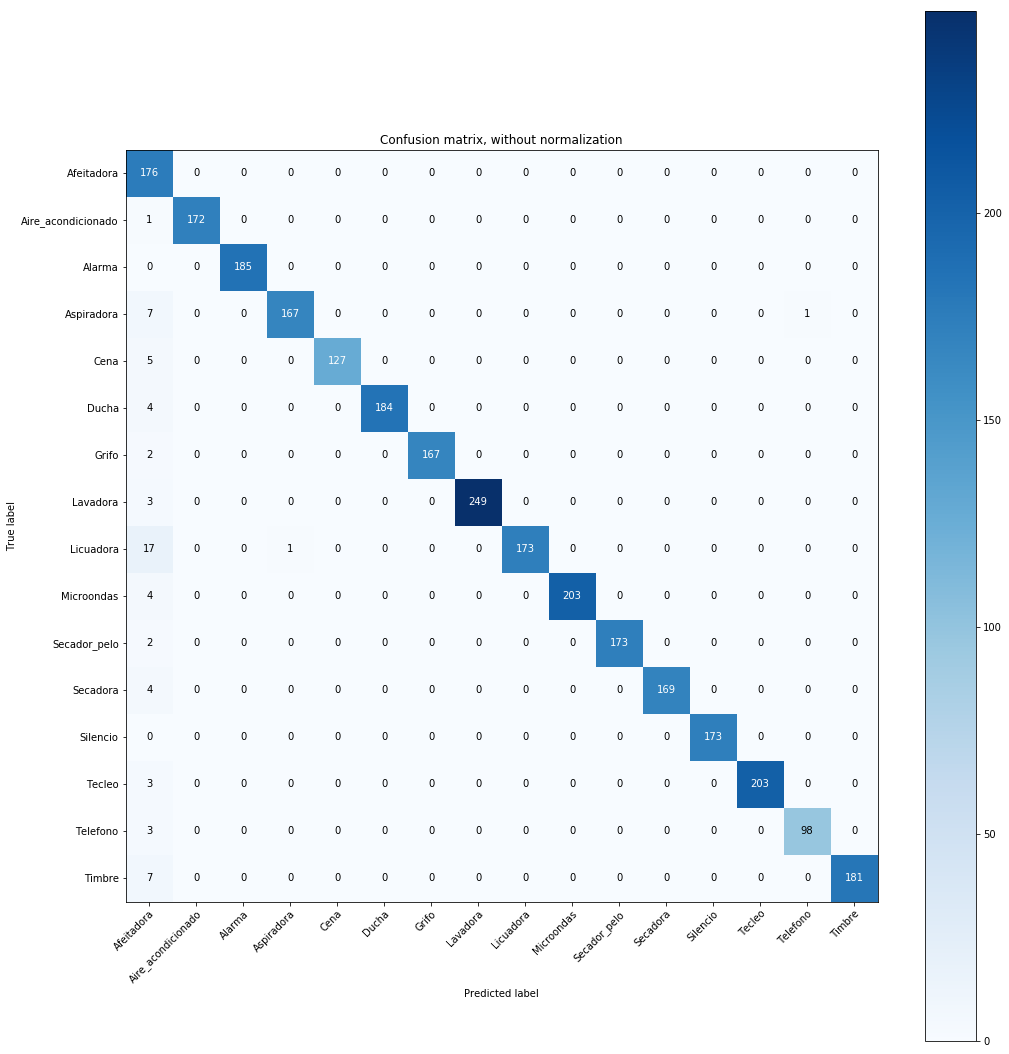

In [188]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

In [189]:
y = label_binarize(y, classes=['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                               'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                               'Licuadora', 'Alarma', 'Grifo', 'Microondas'])
n_classes = y.shape[1]

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [191]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=40))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [192]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [193]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [194]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [195]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [196]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

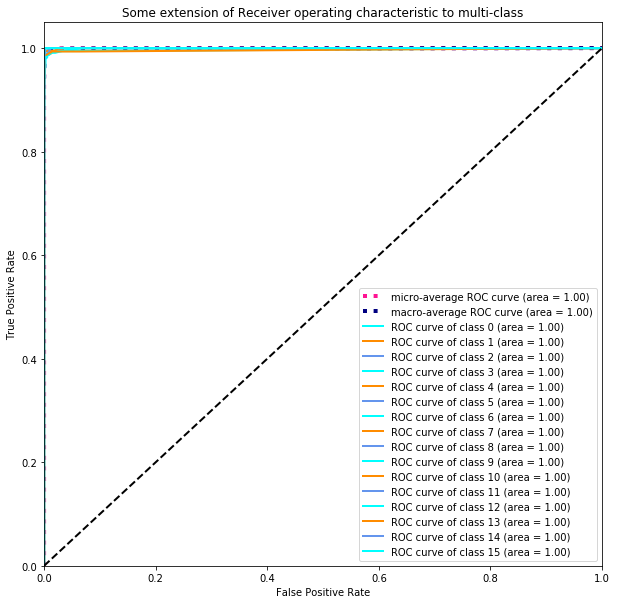

In [197]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# PCA - 8

In [48]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas.io

import matplotlib.pyplot as plt

import librosa.display
import librosa

from glob import glob

import ffmpeg

import os

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy import interp

from itertools import cycle

import seaborn as sns

import pickle

In [49]:
def readCsvToDataFrame(path):
    theDataFrame= pd.read_csv(path)
    return theDataFrame

data = readCsvToDataFrame('data_fourier_64.csv')

In [50]:
features = ['mfcc', 'scem','scom', 'srom','sbwm', 'tempo', 'rmse', 
            'Fourier1', 'Fourier2', 'Fourier3', 'Fourier4', 'Fourier5', 
            'Fourier6', 'Fourier7', 'Fourier8', 'Fourier9', 'Fourier10',
            'Fourier11', 'Fourier12', 'Fourier13', 'Fourier14', 'Fourier15',
            'Fourier16', 'Fourier17', 'Fourier18', 'Fourier19', 'Fourier20',
            'Fourier21', 'Fourier22', 'Fourier23', 'Fourier24', 'Fourier25',
            'Fourier26', 'Fourier27', 'Fourier28', 'Fourier29', 'Fourier30',
            'Fourier31', 'Fourier32', 'Fourier33', 'Fourier34', 'Fourier35', 
            'Fourier36', 'Fourier37', 'Fourier38', 'Fourier39', 'Fourier40',
            'Fourier41', 'Fourier42', 'Fourier43', 'Fourier44', 'Fourier45',
            'Fourier46', 'Fourier47', 'Fourier48', 'Fourier49', 'Fourier50',
            'Fourier51', 'Fourier52', 'Fourier53', 'Fourier54', 'Fourier55',
            'Fourier56', 'Fourier57', 'Fourier58', 'Fourier59', 'Fourier60',
            'Fourier61', 'Fourier62', 'Fourier63', 'Fourier64']

x = data.loc[:, features].values
y = data.loc[:,['momento']].values

x = StandardScaler().fit_transform(x)

In [51]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1',
                                      'principal component 2',
                                      'principal component 3',
                                      'principal component 4',
                                      'principal component 5',
                                      'principal component 6',
                                      'principal component 7',
                                      'principal component 8'])

principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,-4.595156,-0.377164,0.636727,-0.757700,-0.189431,0.013752,1.198434,0.324582
1,-0.978970,1.703222,-0.300574,-0.219647,0.742869,0.686069,-0.423800,-1.787966
2,-0.795181,-3.767258,-2.368437,0.469872,-3.633988,-0.245294,-0.731936,-0.859893
3,8.037264,1.001887,1.419174,0.843256,1.291791,-1.078185,0.694422,-0.896950
4,-1.065728,-2.151955,-0.964314,0.433527,-1.098935,0.245015,-0.592728,1.047701


In [52]:
principalDf.reset_index(drop=True, inplace=True)

aux = data[['momento']]
aux.reset_index(drop=True, inplace=True)

finalDf = pd.concat([principalDf, aux], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,momento
0,-4.595156,-0.377164,0.636727,-0.757700,-0.189431,0.013752,1.198434,0.324582,Timbre
1,-0.978970,1.703222,-0.300574,-0.219647,0.742869,0.686069,-0.423800,-1.787966,Cena
2,-0.795181,-3.767258,-2.368437,0.469872,-3.633988,-0.245294,-0.731936,-0.859893,Lavadora
3,8.037264,1.001887,1.419174,0.843256,1.291791,-1.078185,0.694422,-0.896950,Secador_pelo
4,-1.065728,-2.151955,-0.964314,0.433527,-1.098935,0.245015,-0.592728,1.047701,Aire_acondicionado


In [53]:
print('La variación explicada por cada feature ha sido de {} respectivamente.'.format(pca.explained_variance_ratio_))
print('La variación explicada total de este modelo con respecto al original ha sido del {:.2f}%.'.format(np.sum(pca.explained_variance_ratio_)*100))
print('La variación perdida con respecto al modelo original ha sido del {:.2f}%.'.format(100 - np.sum(pca.explained_variance_ratio_)*100))

La variación explicada por cada feature ha sido de [0.39586861 0.11113832 0.06316713 0.04689699 0.0384689  0.02903307
 0.02813027 0.02311769] respectivamente.
La variación explicada total de este modelo con respecto al original ha sido del 73.58%.
La variación perdida con respecto al modelo original ha sido del 26.42%.


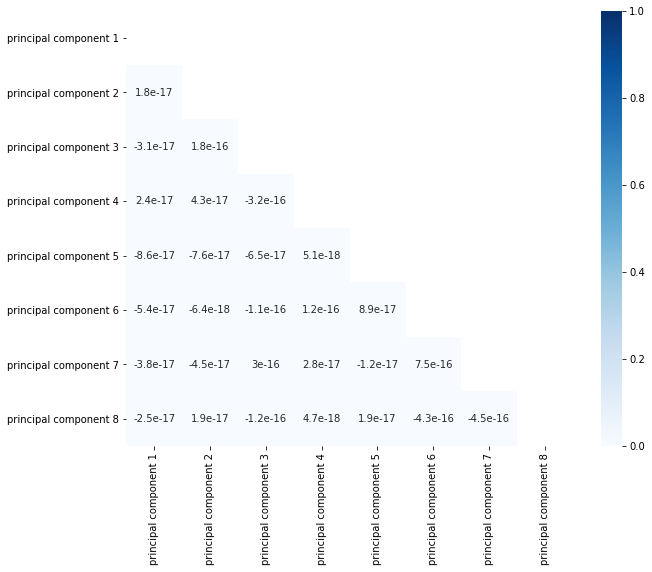

In [54]:
def get_matrix(dataset, classes):
    mask = np.zeros_like(dataset.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.heatmap(dataset.corr(), mask=mask, annot=True, cmap="Blues")

#     sns.set(style="ticks")
#     sns.pairplot(dataset, hue=classes)
    
get_matrix(finalDf, 'momento')

In [55]:
y = pd.get_dummies(data=finalDf.momento)
X = data.loc[:, finalDf.columns != 'momento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [56]:
clf3 = OneVsRestClassifier(RandomForestClassifier(n_estimators=60))
scores = cross_val_score(clf3, X, y, cv=20)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.98463687 0.98743017 0.98044693 0.98743017 0.99441341 0.99301676
 0.98184358 0.99022346 0.97765363 0.98603352 0.99441341 0.99162011
 0.98882682 0.99022346 0.98603352 0.98324022 0.98463687 0.99160839
 0.98741259 0.98041958]
Accuracy: 0.99 (+/- 0.01)


In [57]:
clf3.fit(X_train, y_train)
clf3.score(X_test, y_test)

0.9926675977653632

In [59]:
predictions = clf3.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: Afeitadora            0.0
Aire_acondicionado    0.0
Alarma                0.0
Aspiradora            0.0
Cena                  0.0
Ducha                 0.0
Grifo                 0.0
Lavadora              0.0
Licuadora             0.0
Microondas            0.0
Secador_pelo          0.0
Secadora              0.0
Silencio              0.0
Tecleo                0.0
Telefono              0.0
Timbre                0.0
dtype: float64 degrees.


In [60]:
cls = RandomForestClassifier(n_estimators=40, random_state=0)
cls.fit(X_train, y_train)
importances = cls.feature_importances_

In [61]:
std = np.std([tree.feature_importances_ for tree in cls.estimators_], axis=0)

In [62]:
indices = np.argsort(importances)[::-1]

In [63]:
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

display(pd.DataFrame(cls.feature_importances_, 
                     index = X_train.columns, 
                     columns = ['importance']).sort_values('importance', ascending=False))

Feature ranking:
1. feature 2 (0.193568)
2. feature 0 (0.176627)
3. feature 1 (0.165766)
4. feature 4 (0.153397)
5. feature 6 (0.145889)
6. feature 3 (0.134007)
7. feature 7 (0.017229)
8. feature 5 (0.013519)


,importance
scom,0.193568
mfcc,0.176627
scem,0.165766
sbwm,0.153397
rmse,0.145889
srom,0.134007
Fourier1,0.017229
tempo,0.013519


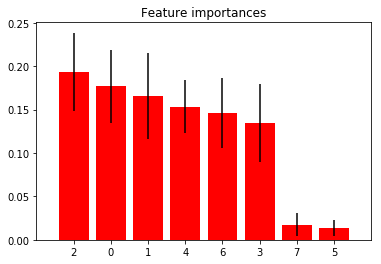

In [64]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [65]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf3.predict(X_test).argmax(axis=1)

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.9926675977653632

In [66]:
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.9922860781315108

In [67]:
precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                          'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                          'Licuadora', 'Alarma', 'Grifo', 'Microondas']
precision_recall.index.name = 'momento_aux'
precision_recall

,precision,recall,f1_score
momento_aux,,,
Cena,0.903553,1.000000,0.949333
Ducha,1.000000,1.000000,1.000000
Lavadora,1.000000,0.994444,0.997214
Aspiradora,0.994083,0.994083,0.994083
Afeitadora,1.000000,0.982906,0.991379
Secador_pelo,0.994652,0.994652,0.994652
Aire_acondicionado,1.000000,0.993789,0.996885
Telefono,1.000000,1.000000,1.000000
Tecleo,1.000000,0.989899,0.994924


Confusion matrix, without normalization
[[178   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 176   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0 179   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0 168   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0 115   1   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0 186   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0 160   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 266   0   0   0   0   0   0   0   0]
 [  1   0   0   1   0   0   0   0 196   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0 177   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 188   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0 194   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0 173   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0 196   0   0]
 [  1   0   0   0   0 

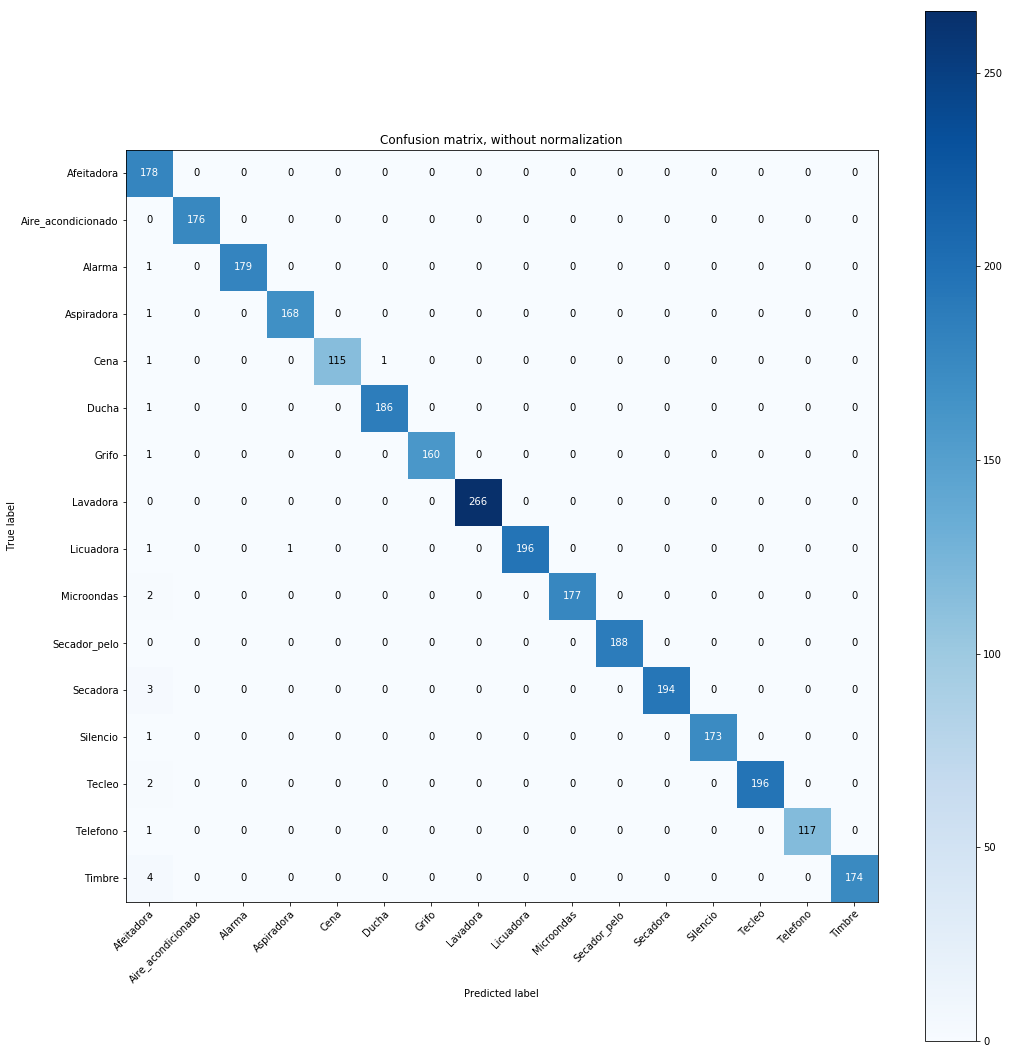

In [68]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

In [69]:
y = label_binarize(y, classes=['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                               'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                               'Licuadora', 'Alarma', 'Grifo', 'Microondas'])
n_classes = y.shape[1]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [71]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=40))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [72]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [73]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [74]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [75]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [76]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

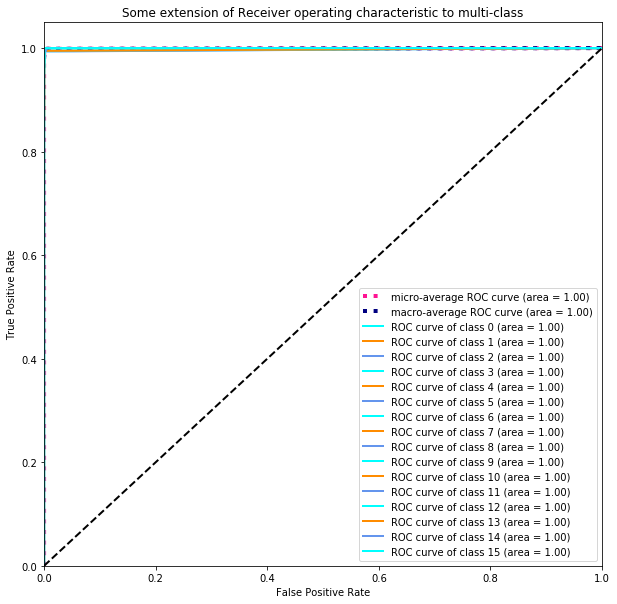

In [77]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Conclusiones

Como se ha podido observar en los diferentes resultados, tras aplicar los diferentes PCA no ha habido una mejora sustancial en la calidad de la regresión, los resultados han pasado de una precisión del 96% al 98% en el mejor de los casos.

Además habría que tener en cuenta la aleatoriedad a la hora de seleccionar el train set y test set. 

A pesar de esto, a la hora de hacer las predicciones voy a aplicar el modelo de PCA con 20 features, ya que aunque el score sea prácticamente el mismo, cabría la posibilidad de que las predicciones fuesen mejores.